Steps:

1- Load Dataset

2- Make dataset iterable

3- Create model class

4- Instantiate model class

5- Instantiate loss class

6- Train model

In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import pdb

In [2]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Processing...
Done!


In [3]:
len(train_dataset)

60000

In [4]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [6]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [7]:
##label of the first image
train_dataset[0][1]

tensor(5)

## Displaying MNIST

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
## Dimension of the image

train_dataset[0][0].numpy().shape

(1, 28, 28)

In [0]:
imag= train_dataset[0][0].numpy().reshape(28,28)

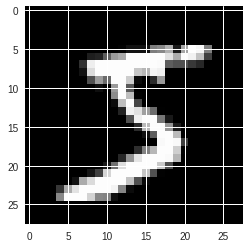

In [11]:
plt.imshow(imag,cmap='gray')

In [0]:
imag = train_dataset[1][0].numpy().reshape(28,28)

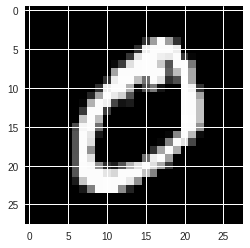

In [0]:
plt.imshow(imag,cmap='gray')

In [0]:
train_dataset[1][1]

tensor(0)

##Loading the test set

In [0]:
test_dataset= dsets.MNIST(root = './data',train= False, download=True, transform=transforms.ToTensor())

In [0]:
len(test_dataset)

10000

In [0]:
type(test_dataset[0])

tuple

In [0]:
test_dataset[0][0].size()

torch.Size([1, 28, 28])

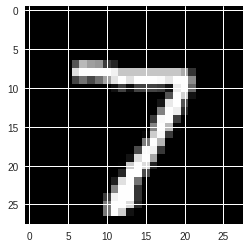

In [0]:
image = test_dataset[0][0].numpy().reshape(28,28)
plt.imshow(image, cmap='gray')

In [0]:
test_dataset[0][1]

tensor(7)

Step : Make dataset iterable


Total data= 60000

Minibatch = 100
    
        number of examples in one iteration
        
Iterations = 3000

1 iteration = 1 mini-batch forward and backward pass

Epochs

1epoch: running through the whole dataset once

Epochs = iterations / totaldata/ minibatch




In [0]:
len(train_dataset)

60000

In [0]:
batch_size = 100
n_iters = 3000


In [0]:

num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)


Create iterable object : Training Dataset



In [0]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size, shuffle=True)

In [0]:
import collections
isinstance(train_loader, collections.Iterable)

True

Create iterable object: Testing Dataset

In [0]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
isinstance(test_loader, collections.Iterable)

True

## Step 3: Building the model

In [0]:
class LogReg(nn.Module):
  def __init__(self,input_dim, output_dim):
    super(LogReg,self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
  
  def forward(self,x):
    out = self.linear(x)
    return(out)

## Step 4: Instantiate Image Class

Input dimention: 
size of omage = 28*28 = 784

Output dimension: 10

0,1,2,3,4,5,6,7,8,9

In [0]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [0]:
input_dim = 28*28
output_dim = 10

In [0]:
model = LogReg(input_dim,output_dim)

## Step 5: Instantiate Loss Class

Logistic Regression: Cross Entorpy Loss

Linear Regression: MSE

In [0]:
criterion = nn.CrossEntropyLoss()

What happens in CrossEntropyLoss?

Computes Softmax(logistic/softmax function)

Computes Cross Entropy


##Step 6: Instantiate Optimizer Class

In [0]:
Learning_rate = 0.001

In [0]:
optimizer = torch.optim.SGD(model.parameters(),lr=Learning_rate)

Parameters In-Depth

In [0]:
print(model.parameters())

print(len(list(model.parameters())))

print(list(model.parameters())[0].size())

print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x7f4ecbdb6ba0>
2
torch.Size([10, 784])
torch.Size([10])


## Step 7: Train model

- Process

1- Convert inputs/outputs to variables

2- Clear gradients buffers

3- Get outputs given inputs

4- Get loss

5- Get gradients w.r.t.parameters

6- Update parameters using gradients 

* parameters = parameters - learning_rate *  parameters_gradients

7- Repeat

In [0]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
            
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))

      
    

Iteration: 500. Loss: 0.7472755908966064. Accuracy: 84
Iteration: 1000. Loss: 0.7726362347602844. Accuracy: 85
Iteration: 1500. Loss: 0.7151734232902527. Accuracy: 85
Iteration: 2000. Loss: 0.6563446521759033. Accuracy: 85
Iteration: 2500. Loss: 0.8184201121330261. Accuracy: 86
Iteration: 3000. Loss: 0.5517458319664001. Accuracy: 86
